In [11]:
import import_ipynb

import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [12]:
#Visualization
import import_ipynb

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


In [13]:
#import import_ipynb
#from pandas.tools.plotting import scatter_matrix


In [14]:
import import_ipynb
from pandas.plotting import scatter_matrix

In [15]:
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,15

Read the Data

In [16]:
data = pd.read_csv("train.csv")
data.columns = [c.lower() for c in data.columns]
y = data.survived

In [17]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
num_cols = list(data.select_dtypes(exclude=['object']).columns)
print('Numeric columns:',num_cols)
print('Categorical columns:',cat_cols)

Numeric columns: ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns: ['name', 'sex', 'ticket', 'cabin', 'embarked']


In [18]:
nunique = data.nunique(dropna=False)
nunique

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             89
sibsp            7
parch            7
ticket         681
fare           248
cabin          148
embarked         4
dtype: int64

Data overview

In [19]:

data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [20]:
data.sample(5)

passengerid  survived  pclass  \
641          642         1       1   
161          162         1       2   
12            13         0       3   
463          464         0       2   
53            54         1       2   

                                                  name     sex   age  sibsp  \
641                               Sagesser, Mlle. Emma  female  24.0      0   
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  female  40.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
463                       Milling, Mr. Jacob Christian    male  48.0      0   
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   

     parch      ticket   fare cabin embarked  
641      0    PC 17477  69.30   B35        C  
161      0  C.A. 33595  15.75   NaN        S  
12       0   A/5. 2151   8.05   NaN        S  
463      0      234360  13.00   NaN        S  
53       0        2926  26.00   NaN        S

In [21]:

print('The shape of the train dataset is {}'.format(data.shape))

The shape of the train dataset is (891, 12)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Total   Percent
cabin       687  0.771044
age         177  0.198653
embarked      2  0.002245
fare          0  0.000000
ticket        0  0.000000

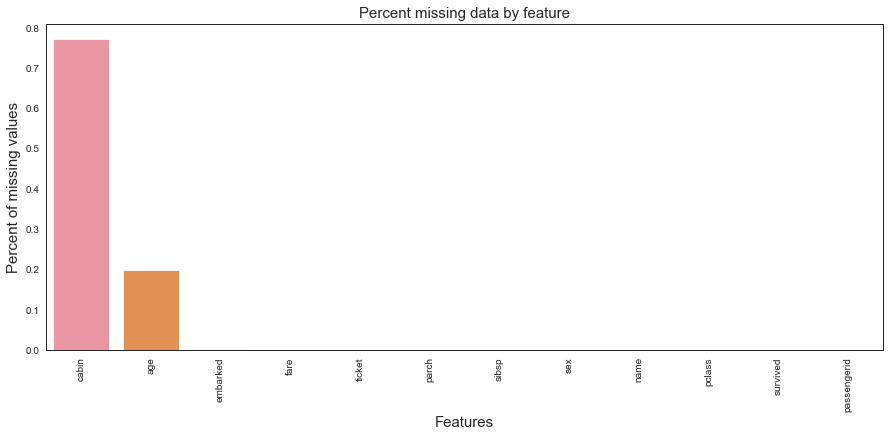

In [23]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.set_context("paper")
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [24]:
data.describe(include='all')

passengerid    survived      pclass                           name  \
count    891.000000  891.000000  891.000000                            891   
unique          NaN         NaN         NaN                            891   
top             NaN         NaN         NaN  Palsson, Miss. Torborg Danira   
freq            NaN         NaN         NaN                              1   
mean     446.000000    0.383838    2.308642                            NaN   
std      257.353842    0.486592    0.836071                            NaN   
min        1.000000    0.000000    1.000000                            NaN   
25%      223.500000    0.000000    2.000000                            NaN   
50%      446.000000    0.000000    3.000000                            NaN   
75%      668.500000    1.000000    3.000000                            NaN   
max      891.000000    1.000000    3.000000                            NaN   

         sex         age       sibsp       parch ticket        fare    cabin  \
count    891  714.000000  891.000000  891.000000    891  891.000000      204   
unique     2         NaN         NaN         NaN    681         NaN      147   
top     male         NaN         NaN         NaN   1601         NaN  B96 B98   
freq     577         NaN         NaN         NaN      7         NaN        4   
mean     NaN   29.699118    0.523008    0.381594    NaN   32.204208      NaN   
std      NaN   14.526497    1.102743    0.806057    NaN   49.693429      NaN   
min      NaN    0.420000    0.000000    0.000000    NaN    0.000000      NaN   
25%      NaN   20.125000    0.000000    0.000000    NaN    7.910400      NaN   
50%      NaN   28.000000    0.000000    0.000000    NaN   14.454200      NaN   
75%      NaN   38.000000    1.000000    0.000000    NaN   31.000000      NaN   
max      NaN   80.000000    8.000000    6.000000    NaN  512.329200      NaN   

       embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

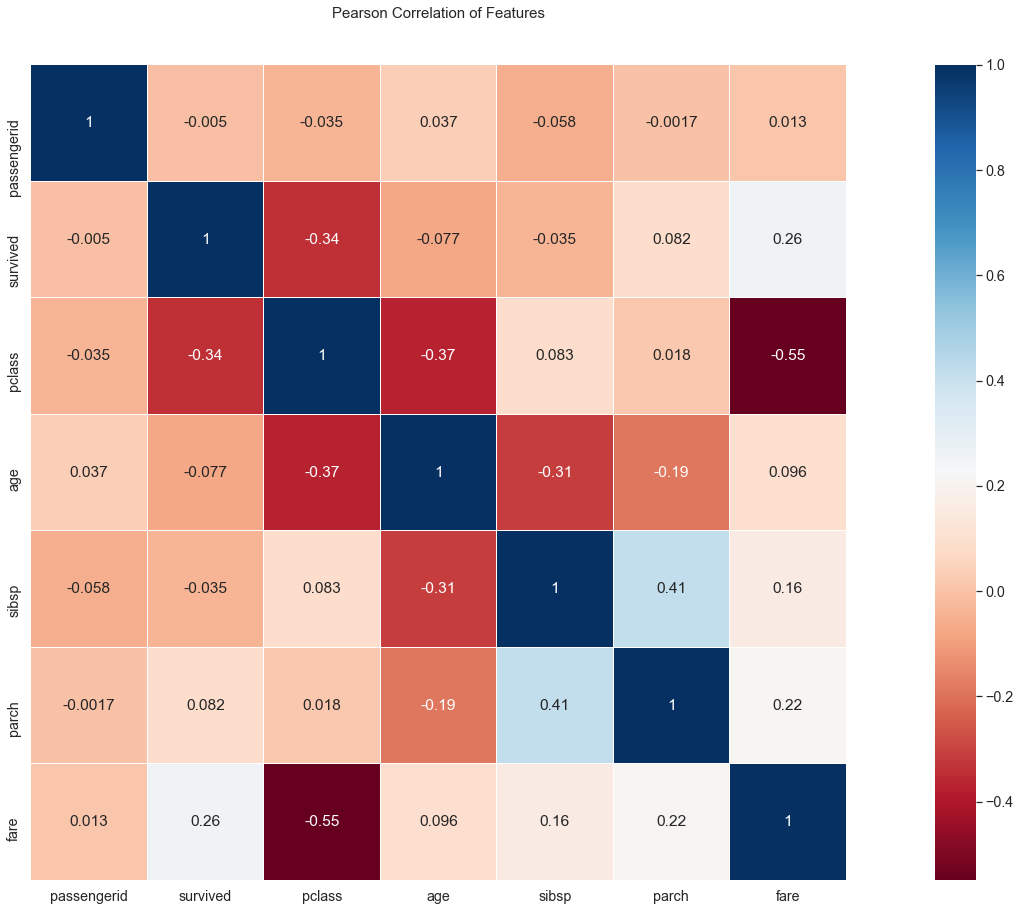

In [25]:
colormap = plt.cm.RdBu
sns.set(font_scale=1.3)
plt.figure(figsize=(32,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [28]:
from pandas.plotting import scatter_matrix

#scatter_matrix(iris_df, alpha=0.2, figsize=(15, 15))

scatter_matrix = pd.scatter_matrix(
    data.drop(columns='passengerid'),
    figsize  = [15, 15],
    #marker   = ".",
    #s        = 0.2,
    #diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

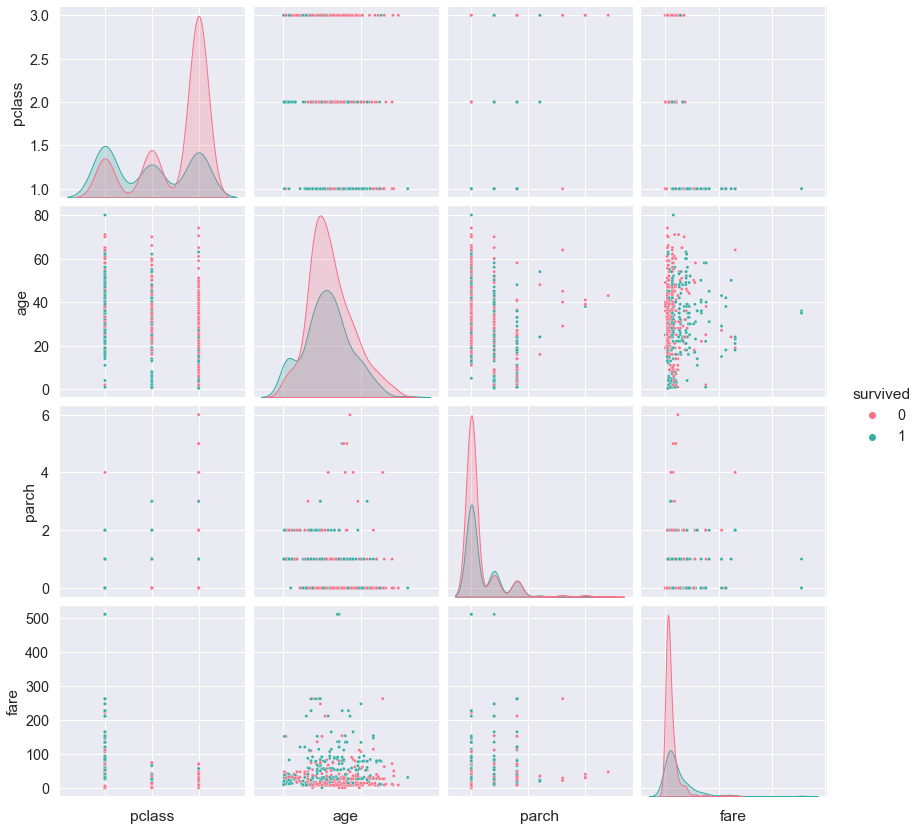

In [29]:
g = sns.pairplot(data[[u'survived', u'pclass', u'sex', u'age', u'parch', u'fare']], hue='survived', palette = 'husl',size=3,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

In [30]:
#Using Pandas' apply method to create a new column "Person"
data['person'] = data.apply(lambda x: 'child' if x.age < 18 else x.sex,axis=1)
print(data.person.value_counts())

# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
data.person.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of Male/Female")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(data.survived, data.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data.pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.age[data.pclass == 1].plot(kind='kde')    
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data.embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

male      519
female    259
child     113
Name: person, dtype: int64


Text(0.5, 1.0, 'Passengers per boarding location')

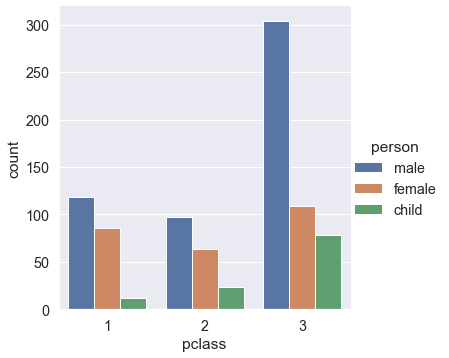

In [31]:
sns.factorplot('pclass',data=data,hue='person',kind='count')

<AxesSubplot:>

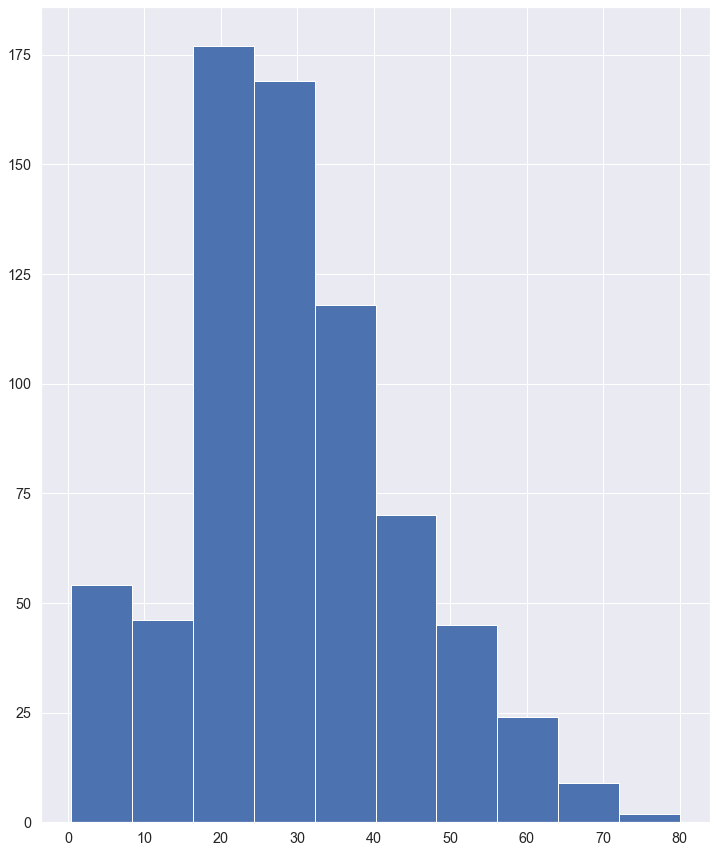

In [32]:
# prefered option as automatically ignore nan values otherwise we could have usesns.distplot(data.age.dropna())
data.age.hist()

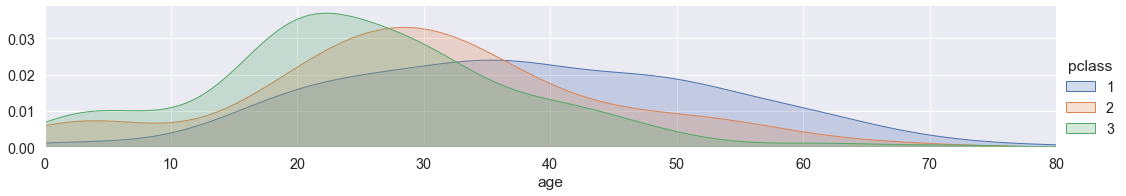

In [33]:
fig = sns.FacetGrid(data,hue='pclass',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

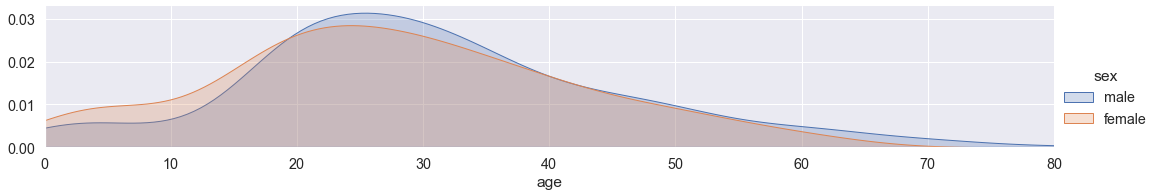

In [34]:
fig = sns.FacetGrid(data,hue='sex',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

In [35]:
deck_data = data[data.cabin.notnull()]
deck_data['level'] = deck_data.apply(lambda x:x.cabin[0],axis=1)
deck_data.head()

passengerid  survived  pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 name     sex   age  sibsp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    parch    ticket     fare cabin embarked  person level  
1       0  PC 17599  71.2833   C85        C  female     C  
3       0    113803  53.1000  C123        S  female     C  
6       0     17463  51.8625   E46        S    male     E  
10      1   PP 9549  16.7000    G6        S   child     G  
11      0    113783  26.5500  C103        S  female     C

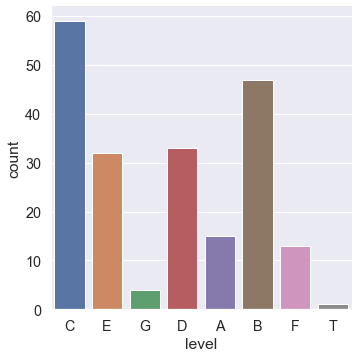

In [36]:
sns.factorplot('level',data=deck_data,kind='count')

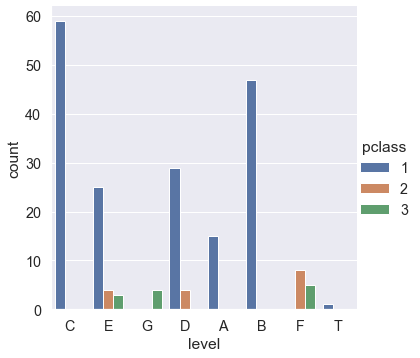

In [37]:
sns.factorplot('level',data=deck_data,hue='pclass',kind='count')

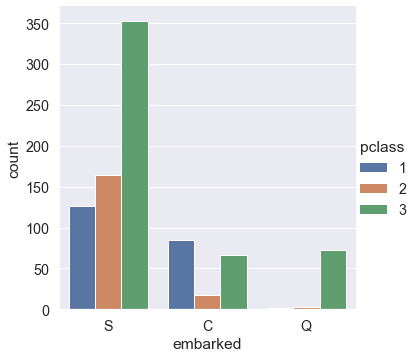

In [38]:
sns.factorplot('embarked',data=data,hue='pclass',kind='count')

In [39]:
#Adding the number of family a passenger had onboard#Adding
data['alone'] = data.apply(lambda x: 'No' if x.sibsp + x.parch > 0 else 'Yes',axis=1)
data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  person alone  
0      0         A/5 21171   7.2500   NaN        S    male    No  
1      0          PC 17599  71.2833   C85        C  female    No  
2      0  STON/O2. 3101282   7.9250   NaN        S  female   Yes  
3      0            113803  53.1000  C123        S  female    No  
4      0            373450   8.0500   NaN        S    male   Yes

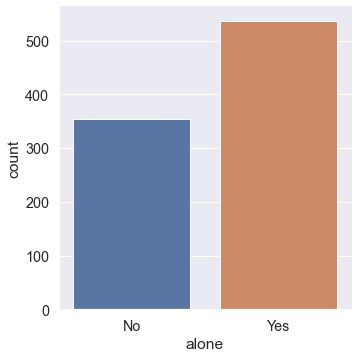

In [40]:
sns.factorplot('alone',data=data,kind='count')

In [41]:
print(data[['pclass','survived']].groupby('pclass').mean())
print(data[['sex','survived']].groupby('sex').mean())

        survived
pclass          
1       0.629630
2       0.472826
3       0.242363
        survived
sex             
female  0.742038
male    0.188908


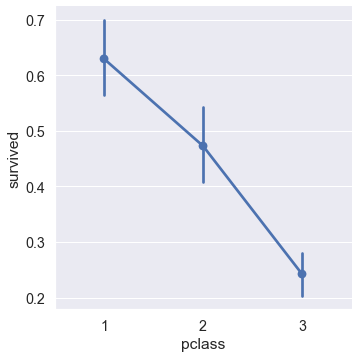

In [42]:
sns.factorplot('pclass','survived',data=data)

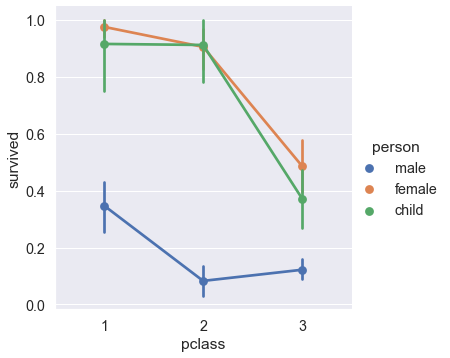

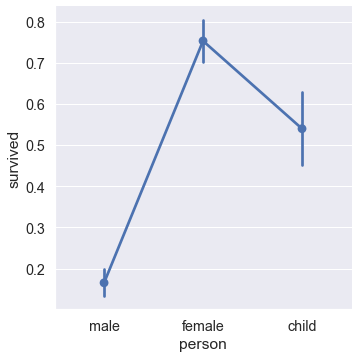

In [43]:
sns.factorplot('pclass','survived',hue='person',data=data)
sns.factorplot('person','survived',data=data)

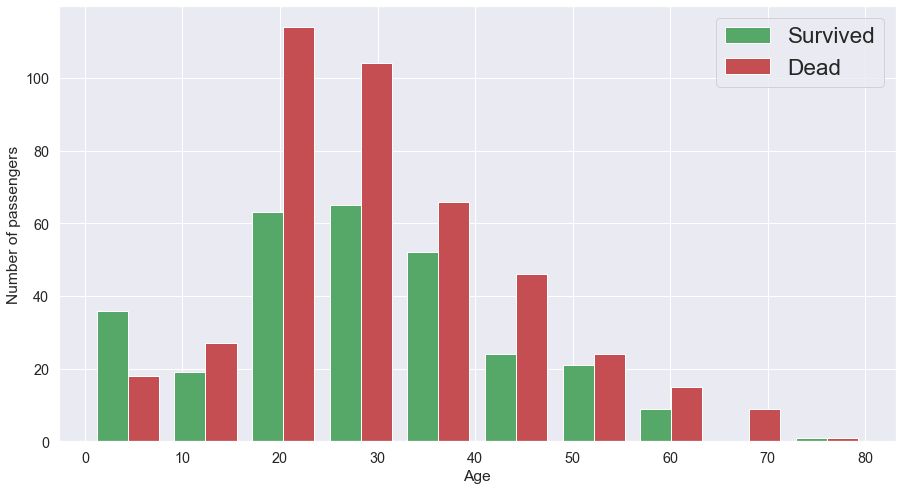

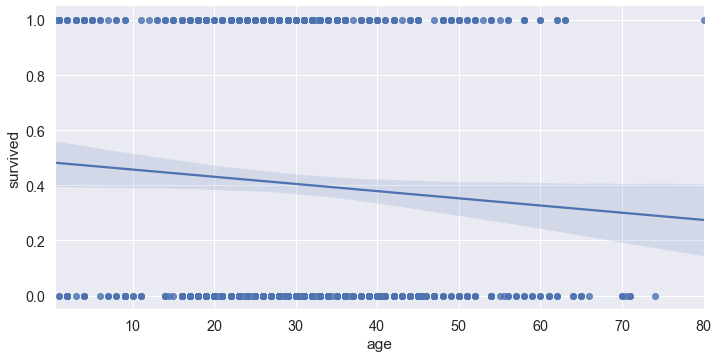

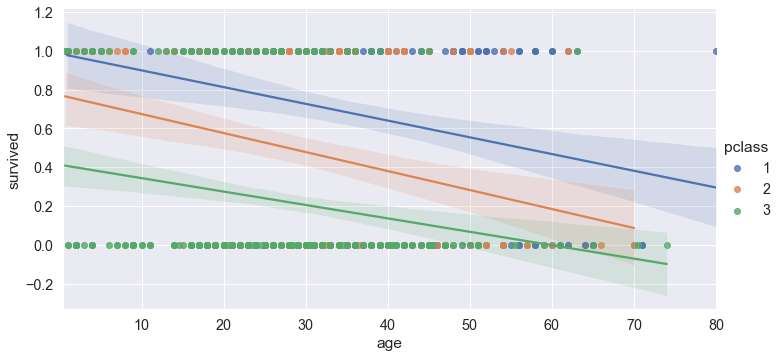

In [44]:
# dead and survived based on age of people
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['age'].dropna(),data[data['survived']==0]['age'].dropna()], color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend(fontsize = 'x-large')
sns.lmplot('age','survived',data=data,aspect=2)
sns.lmplot('age','survived',hue='pclass',data=data,aspect=2)

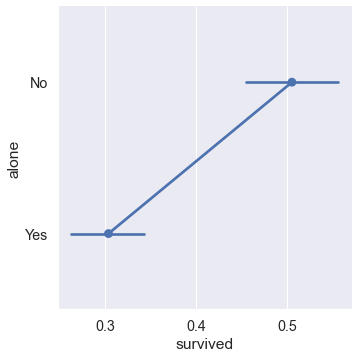

In [45]:
sns.factorplot('survived','alone',data=data)

In [ ]:
data['familysize'] = data['sibsp'] + data['parch'] + 1
data[['familysize', 'survived']].groupby('familysize').mean()

In [ ]:
sns.factorplot('survived','embarked',data=data)

In [46]:
data[['embarked','survived']].groupby('embarked').mean()

survived
embarked          
C         0.553571
Q         0.389610
S         0.336957